## Importing libraries

In [40]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

sns.set_palette('husl')
sns.set_style("whitegrid")

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split,  cross_val_score, GridSearchCV

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Importing dataset

In [41]:
# reading dataset

df = pd.read_csv('bike.csv', parse_dates=True, encoding = "latin1")
df.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [42]:
# df.tail()

In [43]:
# df.sample()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
Date                   17379 non-null object
Season                 17379 non-null int64
Hour                   17379 non-null int64
Holiday                17379 non-null int64
Day of the Week        17379 non-null int64
Working Day            17379 non-null int64
Weather Type           17379 non-null int64
Temperature F          17379 non-null float64
Temperature Feels F    17379 non-null float64
Humidity               17379 non-null int64
Wind Speed             17379 non-null int64
Casual Users           17379 non-null int64
Registered Users       17379 non-null int64
Total Users            17379 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 1.9+ MB


In [45]:
df.describe()

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.485241,11.546752,0.028770,3.003683,0.682721,1.425283,58.777507,59.722009,62.722884,12.736233,35.676218,153.786869,189.463088
std,1.115985,6.914405,0.167165,2.005771,0.465431,0.639357,16.620757,20.415345,19.292983,8.196891,49.305030,151.357286,181.387599
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.600000,3.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,45.200000,42.800000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,2.000000,12.000000,0.000000,3.000000,1.000000,1.000000,59.000000,60.800000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,72.800000,77.000000,78.000000,17.000000,48.000000,220.000000,281.000000
max,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,102.200000,122.000000,100.000000,57.000000,367.000000,886.000000,977.000000


## Data Cleaning

In [46]:
# changing column names


df.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [47]:
df.columns = ['date', 'season', 'hr', 'holiday', 'day_of_week', 
              'working_day', 'weather_type', 'temp', 'temp_feels', 
              'humidity', 'wind_speed', 'casual_users', 'reg_users', 'total']

df['date'] = pd.to_datetime(df['date'])

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month

df['year'] = pd.DatetimeIndex(df['date']).year
df['year']=df['year']-2011

df["season"] = df['season'].map({1 : "Spring", 
                                 2 : "Summer", 
                                 3 : "Fall", 
                                 4 : "Winter" })

df["day_of_week"] = df['day_of_week'].map({0 : "Sunday", 
                                           1 : "Monday", 
                                           2 : "Tuesday", 
                                           3 : "Wednesday", 
                                           4 : "Thursday", 
                                           5 : "Friday",
                                           6 : "Saturday" })
# Weather type
# 1 : " Clear + Few clouds + Partly cloudy + Partly cloudy"
# 2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist "
# 3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
# 4 : " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [48]:
# missing values
df.isna().sum()

date            0
season          0
hr              0
holiday         0
day_of_week     0
working_day     0
weather_type    0
temp            0
temp_feels      0
humidity        0
wind_speed      0
casual_users    0
reg_users       0
total           0
day             0
month           0
year            0
dtype: int64

In [49]:
# df['wind_speed'].quantile([0.25, 0.75])

In [50]:
# cat_cols = ['day_of_week', 'holiday', 'working_day']
# for i in cat_cols:
#     df[i] = df[i].astype('category')

In [51]:
# value counts

# for i in df.columns:
#     print(df[i].value_counts())

## Visual EDA

In [52]:
# # target column distribution

# plt.figure(figsize=(16,6))
# sns.countplot(df['total'], kde=False)

In [53]:
# sns.pairplot(df)

In [54]:
# # heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, fmt='.2f', center=0)

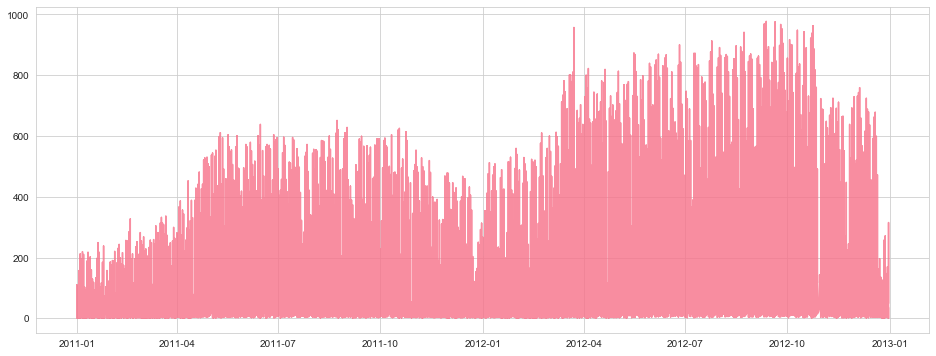

In [55]:
# date vs count plot

plt.figure(figsize=(16,6))
plt.plot(df['date'], df['total'], alpha=0.8)
plt.show()

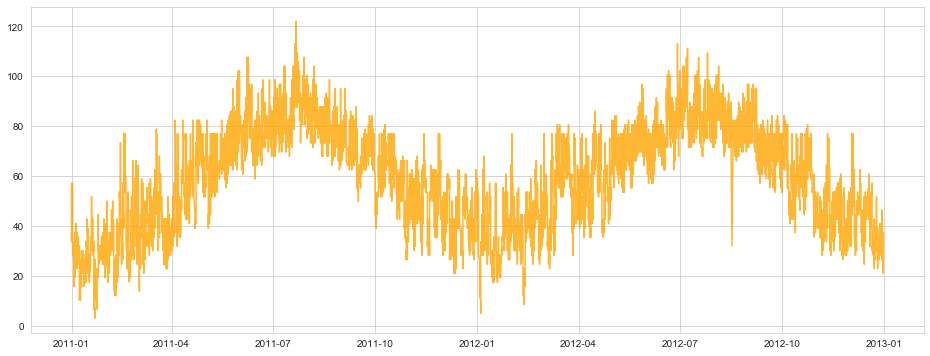

In [56]:
# date vs temp plot

plt.figure(figsize=(16,6))
plt.plot(df['date'], df['temp_feels'], alpha=0.8, color='orange')

In [57]:
sns.set_palette('RdBu_r')

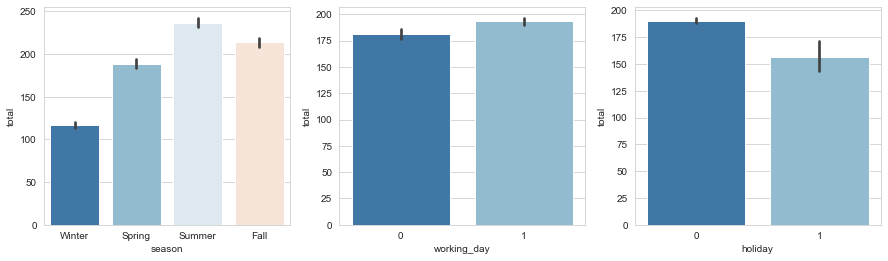

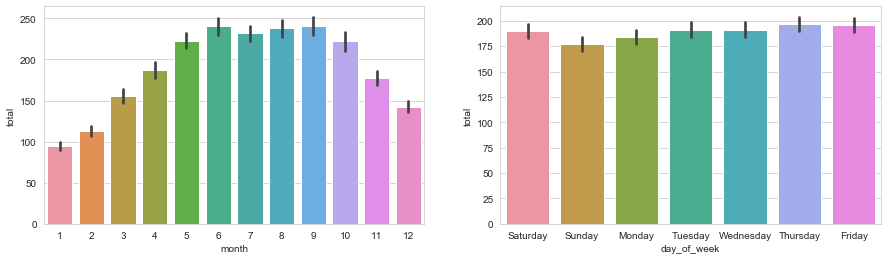

In [58]:
fig, axes = plt.subplots(figsize=(15, 4), ncols=3)
sns.barplot(x='season', y='total', data=df, ax=axes[0])
sns.barplot(x='working_day', y='total', data=df, ax=axes[1])
sns.barplot(x='holiday', y='total', data=df, ax=axes[2])

fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
sns.barplot(x='month', y='total', data=df, ax=axes[0])
sns.barplot(x='day_of_week', y='total', data=df, ax=axes[1])

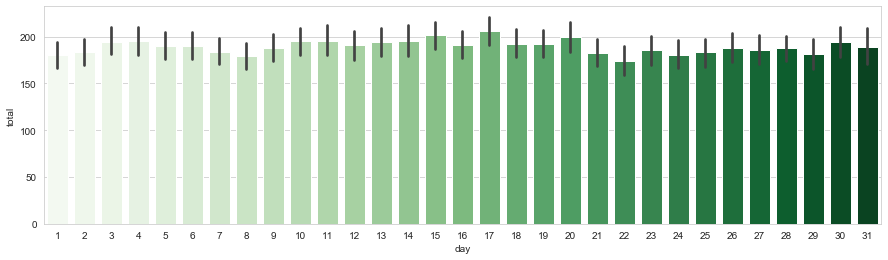

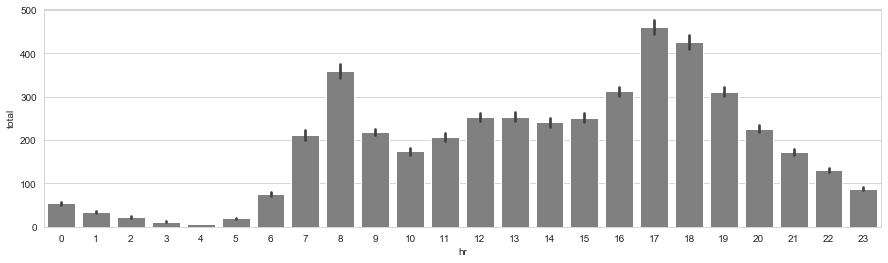

In [59]:
sns.set_palette('rocket')
fig, axes = plt.subplots(figsize=(15, 4))
sns.barplot(x='day', y='total', data=df, palette='Greens')

sns.set_palette('rocket')
fig, axes = plt.subplots(figsize=(15, 4))
sns.barplot(x='hr', y='total', data=df, color='Grey')

In [60]:
# for i in ['hr', 'month', 'day', 'day_of_week', 'season']:
#     plt.figure(figsize=(16,6))
#     # plt.bar(df['hr'], df['temp'], alpha=0.8)
#     sns.barplot(x=i, y="total", data=df, estimator=np.mean)

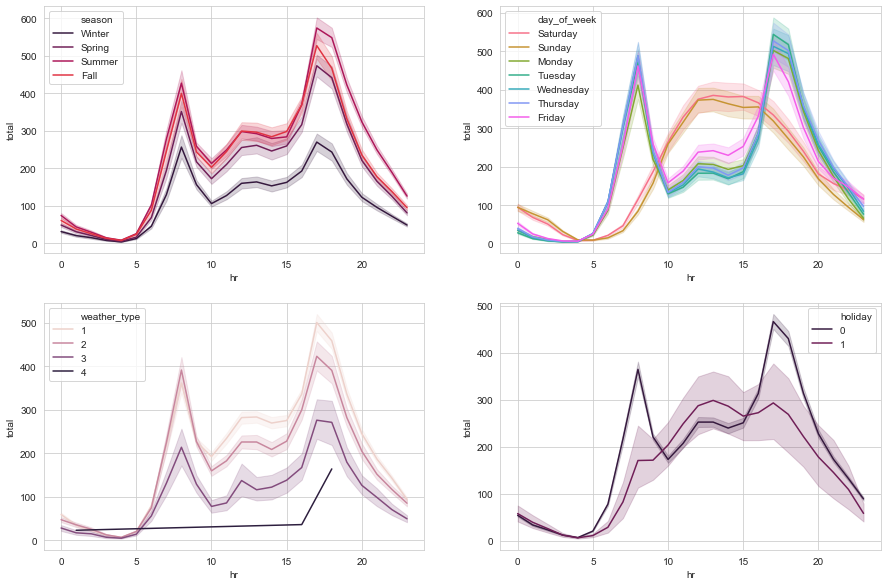

In [61]:
fig, axes = plt.subplots(figsize=(15, 10), ncols=2, nrows=2)
sns.lineplot(x='hr', y='total', hue='season', data=df, ax=axes[0][0])
sns.lineplot(x='hr', y='total', hue='day_of_week', data=df, ax=axes[0][1])
sns.lineplot(x='hr', y='total', hue='weather_type', data=df, ax=axes[1][0])
sns.lineplot(x='hr', y='total', hue='holiday', data=df, ax=axes[1][1])

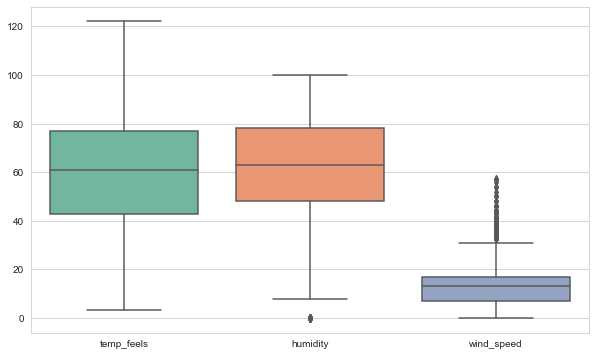

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['temp_feels','humidity','wind_speed']], palette="Set2")

In [63]:
df.head()

,date,season,hr,holiday,day_of_week,working_day,weather_type,temp,temp_feels,humidity,wind_speed,casual_users,reg_users,total,day,month,year
0,2011-01-01,Winter,0,0,Saturday,0,1,36.6,37.4,81,0,3,13,16,1,1,0
1,2011-01-01,Winter,1,0,Saturday,0,1,34.9,35.6,80,0,8,32,40,1,1,0
2,2011-01-01,Winter,2,0,Saturday,0,1,34.9,35.6,80,0,5,27,32,1,1,0
3,2011-01-01,Winter,3,0,Saturday,0,1,36.6,37.4,75,0,3,10,13,1,1,0
4,2011-01-01,Winter,4,0,Saturday,0,1,36.6,37.4,75,0,0,1,1,1,1,0


## Preprocessing

In [64]:
# min-max scaling
features=['temp', 'temp_feels', 'humidity', 'wind_speed']
for i in features:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])
    
# one hot encoding using pandas get_dummies
features=['weather_type', 'season']
for i in features:
    temp=pd.get_dummies(df[i], prefix=i, prefix_sep='_')
    df=pd.concat([df,temp], axis=1)
    df=df.drop(i, axis=1)
    
# cyclic encoding cyclic variables
def cyc_enc(df, col, max_vals):
    df[col+'_sin'] = np.sin(2 * np.pi * df[col]/max_vals)
    df[col+'_cos'] = np.cos(2 * np.pi * df[col]/max_vals)
    return df
df = cyc_enc(df, 'hr', 24)
df = cyc_enc(df, 'month', 12)
df = cyc_enc(df, 'day', 31)
    
# PCA to reduce components
pca = PCA(n_components=1)
df['temperature'] = pca.fit_transform(df[['temp','temp_feels']])
df = df.drop(columns=['temp', 'temp_feels'])

In [65]:
# plt.figure(figsize=(16,6))
# plt.boxplot(df[['temp_feels','humidity','wind_speed']])

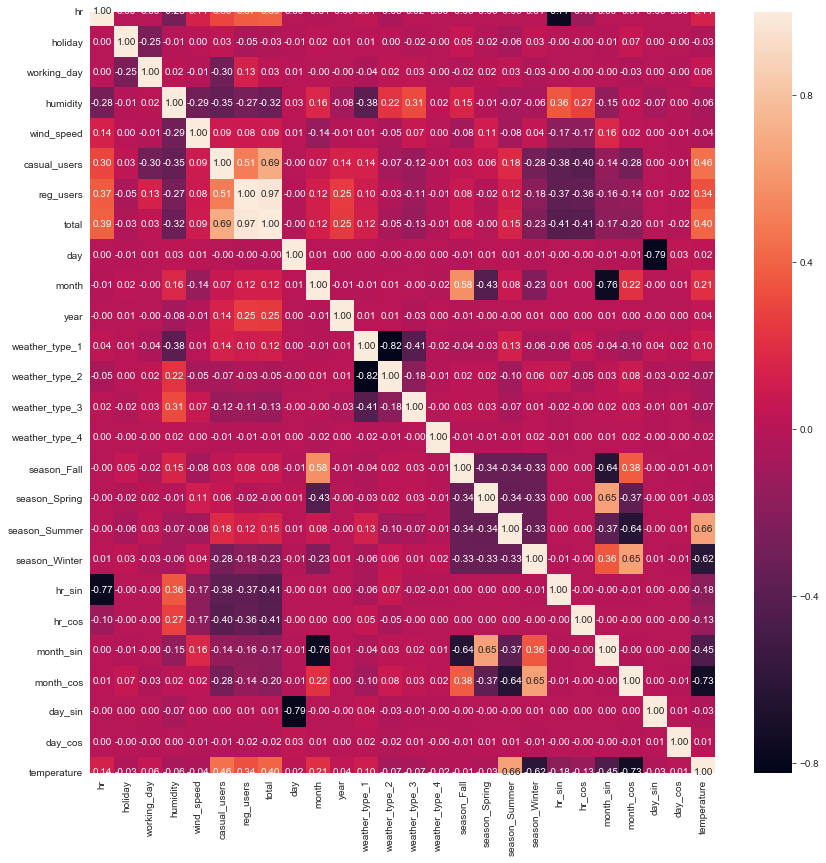

In [66]:
# # final correlation matrix

plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [67]:
df.head()

,date,hr,holiday,day_of_week,working_day,humidity,wind_speed,casual_users,reg_users,total,...,season_Spring,season_Summer,season_Winter,hr_sin,hr_cos,month_sin,month_cos,day_sin,day_cos,temperature
0,2011-01-01,0,0,Saturday,0,0.81,0.0,3,13,16,...,0,0,1,0.000000,1.000000,0.5,0.866025,0.201299,0.97953,-0.321046
1,2011-01-01,1,0,Saturday,0,0.80,0.0,8,32,40,...,0,0,1,0.258819,0.965926,0.5,0.866025,0.201299,0.97953,-0.346147
2,2011-01-01,2,0,Saturday,0,0.80,0.0,5,27,32,...,0,0,1,0.500000,0.866025,0.5,0.866025,0.201299,0.97953,-0.346147
3,2011-01-01,3,0,Saturday,0,0.75,0.0,3,10,13,...,0,0,1,0.707107,0.707107,0.5,0.866025,0.201299,0.97953,-0.321046
4,2011-01-01,4,0,Saturday,0,0.75,0.0,0,1,1,...,0,0,1,0.866025,0.500000,0.5,0.866025,0.201299,0.97953,-0.321046


## Train Test Split

In [68]:
X = df.drop(['date','total', 'day_of_week', 'reg_users', 'casual_users'], axis=1)
y = df['total']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

## Regression Models

128.4397843666944
93.31162259590032


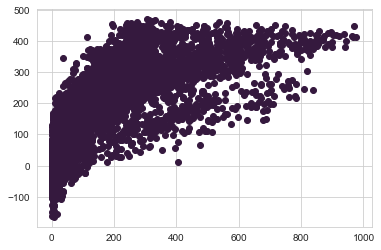

In [69]:
# linear regression

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_pred, y_test)))
print(mean_absolute_error(y_pred, y_test))

plt.scatter(y_test, y_pred)
plt.show()

75.71005722345339
47.624664365170695


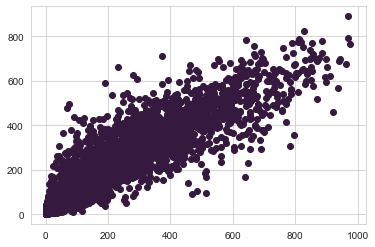

In [70]:
# k nearest neighbours regressor

knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print(np.sqrt(mean_squared_error(y_pred, y_test)))
print(mean_absolute_error(y_pred, y_test))

plt.scatter(y_test, y_pred)
plt.show()

61.214260217766565
37.5343306482547


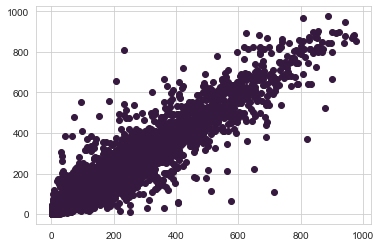

In [71]:
# decision tree regressor

dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

print(np.sqrt(mean_squared_error(y_pred, y_test)))
print(mean_absolute_error(y_pred, y_test))
# print(y_test[:10])
# print(y_pred[:10])

plt.scatter(y_test, y_pred)
plt.show()

47.973463448489674
29.569505178365937


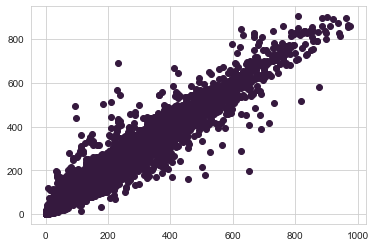

In [72]:
# random forest regressor

rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_pred, y_test)))
print(mean_absolute_error(y_pred, y_test))

plt.scatter(y_test, y_pred)
plt.show()

1829.5826086770182
27.25057143121157
8092     175
10813    535
2062     130
911       69
10921     29
5454       7
15632    332
10482    223
1406      51
13020    413
Name: total, dtype: int64
[1.52056703e+02 4.42130402e+02 1.08129279e+02 5.99691739e+01
 2.35271632e+01 2.26639722e-01 3.47658413e+02 2.27183696e+02
 5.16597177e+01 4.13828628e+02]


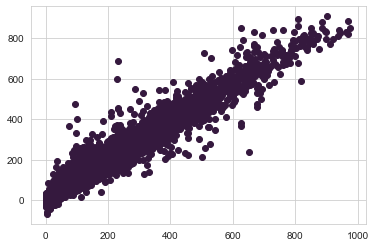

In [73]:
from lightgbm import LGBMRegressor
model=LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.6746393485503049, importance_type='split',
              learning_rate=0.03158974434726661, max_bin=55, max_depth=-1,
              min_child_samples=159, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1458, n_jobs=-1, num_leaves=196, objective=None,
              random_state=18, reg_alpha=0.23417614793823338,
              reg_lambda=0.33890027779706655, silent=False,
              subsample=0.5712459474269626, subsample_for_bin=200000,
              subsample_freq=1)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(y_test[:10])
print(y_pred[:10])

plt.scatter(y_test, y_pred)

In [74]:
# from xgboost import XGBRegressor
# model = XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
#                 max_depth = 15, n_estimators = 700, random_state=2019)

In [ ]:
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)


hyperparameters = {"criterion": ["mse", "mae"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   # 'min_samples_leaf' : range(2,5),
                   # 'min_samples_split' : range(2,5),
#                    "n_estimators": range(10,12)
}

grid = GridSearchCV(rf, 
                    param_grid=hyperparameters, 
                    cv=10)

grid.fit(X, y)

best_params = grid.best_params_
best_score = grid.best_score_

rf = grid.best_estimator_
y_pred = rf.predict(X_test)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(y_test[:10])
print(y_pred[:10])
plt.scatter(y_test, y_pred)

In [ ]:
# box plot - temp_feels, humidity, windspeed

# one hot encode - holiday, weather_type
# drop - temp, casual_users, reg_users
# min-max scale - temp_feels, humidity, windspeed
# cyclic encode - season, hr, day_of_week, month, day
# year - current_year - 2011

# X - all the required features
# y - target

# train-test split
# linear regression model
# fit
# rmse
# plot actural, predict


# ----------------------------------------------

#cross validation
#grid search
#cyclic encoding
#

In [ ]:
rf.feature_importances_